# Project: Wrangling and Analyze Data

In [1]:
# import the liberies 
import numpy as np
import pandas as pd
import requests
import datetime
import json 
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import pos_tag
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
warnings.filterwarnings('ignore')

## Gather Data
 The data needed are downloaded into the dataframe. Here, three data are required to be downloaded. The twitter_archive_enhanced.csv is downloaded manually, while the tweet image prediction, Tweet JSON are downloaded programatically

###  Enhanced 
Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read the enhanced twitter archive
archive_df = pd.read_csv(r"twitter-archive-enhanced.csv")
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# URL downloaded programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

# Read TSV file   
image_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
consumer_key = 'xx'
consumer_secret = 'xx'
access_token = 'xx'
access_secret = 'xx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
list_df = []

with open('tweet-json.txt') as file:
    for line in file:
        list_df.append(json.loads(line))        

In [7]:
print(list_df[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
json_df = pd.DataFrame(list_df, columns = ['id',
                                           'retweet_count',
                                            'favorite_count'])

In [9]:
json_df.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
Now that we have three dataframes; 'archive_df', 'image_df', and 'json_df'. They will be assessed visually and programmatically. 


#### Visual assessment
Each data gathered displayed for visual assessment

In [10]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Programmatic Assessment
Each data gathered displayed for Programmatic assessment

#### Twitter archive

In [13]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Display random sample
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1448,696405997980676096,NaN,NaN,2016-02-07 18:51:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berb. He just found out that they have...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696405997...,7,10,Berb,None,None,None,None
243,846139713627017216,NaN,NaN,2017-03-26 23:20:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,NaN,NaN,NaN,https://twitter.com/csncapitals/status/8460884...,13,10,None,None,None,None,None
2200,668655139528511488,NaN,NaN,2015-11-23 04:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,None,None,None,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None


In [15]:
# mean, median, mode, percentile
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# Display duplicate count
archive_df.duplicated().sum()

0

In [17]:
# Display empty value count
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# Checking if the rating_numerator and rating_denominator are correctly extracted
archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


six rows where incorrectly extracted

In [19]:
archive_df.iloc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [20]:
archive_df.iloc[340]

tweet_id                                                     832215909146226688
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-02-16 13:11:49 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Logan, the Chow who liv...
retweeted_status_id                                                 7.86709e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-10-13 23:23:56 +0000
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

In [21]:
archive_df.iloc[695]

tweet_id                                                     786709082849828864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-10-13 23:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Logan, the Chow who lived. He solemnly...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

In [22]:
archive_df.iloc[763]

tweet_id                                                     778027034220126208
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-09-20 00:24:34 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Sophie. She's a Jubilant Bush Pupper. ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                             27
rating_denominator                                                           10
name                                    

In [23]:
archive_df.iloc[1689]

tweet_id                                                     681340665377193984
in_reply_to_status_id                                               6.81339e+17
in_reply_to_user_id                                                 4.19698e+09
timestamp                                             2015-12-28 05:07:27 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          I've been told there's a slight possibility he...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [24]:
archive_df.iloc[1712]

tweet_id                                                     680494726643068929
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-12-25 21:06:00 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here we have uncovered an entire battalion of ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/680494726...
rating_numerator                                                             26
rating_denominator                                                           10
name                                    

To know the correct figures for the 'rating_numerator' and 'rating_denominator'. 
manually checked using the expanded_urls;
45 (883482846933004288) rating_numerator is 13.5
695 (786709082849828864) rating_numerator is 9.75
763 (778027034220126208) rating_numerator is 11.27
1712 (680494726643068929) rating_numerator is 11.26
340(832215909146226688) is a retweet, and 1689 (681340665377193984) has no expanded_urls, I do not need it

### Image prediction

In [25]:
# concise summary
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# Random saomple
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
458,674788554665512960,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,1,miniature_poodle,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834,True,Chihuahua,0.024099,True,chow,0.003941,True
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
1000,708711088997666817,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,2,tennis_ball,0.912961,False,German_short-haired_pointer,0.052695,True,Labrador_retriever,0.018477,True


In [27]:
# mean, median, mode, percentile
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
# Display duplicate count
image_df.duplicated().sum()

0

In [29]:
# Display empty value count
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### JSON tweet

In [30]:
# Concise summary
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
# Random sample
json_df.sample(5)

,id,retweet_count,favorite_count
2256,667724302356258817,341,517
608,797545162159308800,5656,16198
991,748575535303884801,2272,6696
533,807106840509214720,56625,107015
283,838921590096166913,2357,12183


In [32]:
# Display duplicate count
json_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [33]:
# Display empty value count
json_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

## Quality Issues
### Quality Issues for twitter archive
1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id have large amount of missing values it will be needed to be dropped
2. Incorrect data types for tweet_id, timestamp, rating_denominator, and rating_numerator
3. Retweets and tweets with missing expanded_url to be dropped
4. Some rating_numerator and rating_denominators incorrectly extracted
5. Column name floofer instead of floof
6. lowercase dog names

### Quality  for image prediction
1. Incorrect data types for tweet_id
2. In p1, p2, p3 the dog breeds have underscorces instead of spaces
3. In p1, p2, p3 the dog breeds have inconsistent letter casing

### Quality Issues for Json_tweet
1. Incorrect data types for tweet_id, it should be a string
2. id column should be changed to tweet_id

### General Quality Issues
1. check that there are only tweets before Aug. 2017

## Tidiness issues
### Tidiness Issues for twitter archive
1. doggo, floofer, pupper, puppo are column headers, it should be an observation on a row
2. dog_stage column should be created for the different dog stages, doggo, floofer, pupper, puppo

### General Tidiness Issues
1. all the dataframes should be merged

## Cleaning Data
In this section, I will clean all of the issues documented while assessing. 

#### Copy of dataframes before cleaning
Before the datasets are cleaned, I will first make a copy of each  

In [34]:
archive_clean = archive_df.copy()

In [35]:
image_clean = image_df.copy()

In [36]:
json_clean = json_df.copy()

####  Replace underscore with space

#### Define
Replace underscore with space in 'p1', 'p2', and 'p3, that is the appropriate format

#### Code

In [37]:
#replace the underscore with space
image_clean.p1 = image_clean.p1.str.replace('_',' ')
image_clean.p2 = image_clean.p2.str.replace('_',' ')
image_clean.p3 = image_clean.p3.str.replace('_',' ')

#### Test

In [38]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


### Correct capitalisation 

#### Define
Capitalise the dog names in the 'name' column in archive_clean tables and the dog breeds in 'p1', 'p2', and 'p3' in image_clean

#### Code

In [39]:
# capitalise the dog breeds in 'p1', 'p2', and 'p3' in image_clean
image_clean.p1 = image_clean.p1.str.title()
image_clean.p2 = image_clean.p2.str.title()
image_clean.p3 = image_clean.p3.str.title()
# capitalise the column 'name' in archive_clean
archive_clean.name = archive_clean.name.str.title()

#### Test

In [40]:
image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Change the datatypes for some columns

#### Define
Change the datatype for the'tweet_id' column in archive_clean and image_clean, the datatype for 'id' column in json_clean tables to string, and the timestamp datatype in archive_clean to datetime, the rating_numerator and rating_denominator to float 

#### Code

In [41]:
# Change the datatypes
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
json_clean.id = json_clean.id.astype(str)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

#### Test

archive_clean.info()
image_clean.info()
json_clean.info()

### Check for tweets after August 2017

#### Define
Check that there are no tweets after August 2017, they are not needed

#### Code/Test

In [42]:
# check
archive_clean.timestamp.max()

Timestamp('2017-08-01 16:23:56')

### Rename some columns

#### Define
Renaming the 'floofer' column to 'floof' in the archive_clean table  and 'id' column to 'tweet_id' in the json_clean table

#### Code

In [43]:
# Rename the 'floofer' column to 'floof' in archive_clean
archive_clean.rename(columns={"floofer": "floof"}, inplace=True)

# Rename the 'id' column to 'tweet_id' in the json_clean table
json_clean.rename(index=str, columns={"id": "tweet_id"}, inplace=True)

#### Test

archive_clean.info()
json_clean.info()

### Create a new column and remove some

#### Define
dog_stage column should be created for the different dog stages which are; doggo, floofer, pupper, puppo, and doggo. 

#### Code

In [44]:
#creating a new column 'dog_stage'
archive_clean['dog_stage'] = archive_clean.text.str.extract('(doggo | floof | pupper | puppo)', expand = True)

#some whitespaces also got extracted to the 'dog_stage' column, thus removing them
archive_clean.dog_stage = archive_clean.dog_stage.str.strip()

#dropping the columns
archive_clean = archive_clean.drop(['doggo', 'floof', 'pupper', 'puppo'], axis = 1)

#changing the datatype of 'dog_stage' to category
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

#### Test

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
dog_stage                     264 non-null category
dtypes: category(1), datetime64[ns](1), float64(6), object(6)
memory usage: 241.8+ KB


### Correct rating_numerator incorrectly extracted 

#### Define
Correct rating_numerator incorrectly extracted 

#### Code

In [46]:
# correct with the right values
archive_clean.iloc[45, 10] = 13.5
archive_clean.iloc[695,10] = 9.75
archive_clean.iloc[763, 10] = 11.27
archive_clean.iloc[1712, 10] = 11.26

#### Test

In [47]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.50,10.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.00,10.0
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0
1689,I've been told there's a slight possibility he...,5.00,10.0
1712,Here we have uncovered an entire battalion of ...,11.26,10.0


row 340 is a retweet and row 1712 has no image they are not useful to the analysis, they will be dropped. The rows that are useful(original tweets)  that were incorrectly extracted  have been corrected

### Merge the three dataframes

#### Define
Merge both the archive_clean and json_clean tables into one table, then Merge the newly merge_df1 table and combine with the image_clean table 

#### Code

In [48]:
# first merge
merge_df1 = archive_clean.join(json_clean.set_index('tweet_id'), on='tweet_id')

In [49]:
# final merge
master = merge_df1.join(image_clean.set_index('tweet_id'), on='tweet_id')

#### Test

In [50]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
dog_stage                     264 non-null category
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num         

### Delete rows and columns not needed

#### Define
Dropping the retweets, reply records, we only need original tweets  so I will drop the columns we do not need and drop the tweets that do not have an image or have images but do not display dogs

#### Code

In [51]:
#We only want the rows without an entry in “retweeted_status_id”
master = master[pd.isnull(master['retweeted_status_id'])]
#We only want the rows without an entry in “in_reply_to_status_id”
master = master[pd.isnull(master['in_reply_to_status_id'])]
# The rows without an image are the ones that the “jpg_url” column is not null
master = master.dropna(subset = ['jpg_url'])

In [52]:
#drop the unneeded columns
master.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"],inplace=True, axis = 1)

#### Test

In [53]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
dog_stage             213 non-null category
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf          

In [54]:
master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853.0,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328.0,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964.0,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774.0,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

convert the cleaned dataframe to a csv, and read into the pandas dataframe

In [55]:
# convert
master.to_csv('twitter_archive_master.csv', index=False)

In [56]:
# Read in
master = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize the wrangled data. 

### Visualization
It will be visualized using tables, and charts

In [57]:
# Concise summary
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
dog_stage             213 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-n

In [58]:
master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853.0,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328.0,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964.0,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774.0,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [59]:
master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.360418e+17,12.178985,10.477423,2784.449518,8949.106545,1.201928,0.594558,1.345850e-01,6.016556e-02
std,6.752810e+16,41.607230,6.853275,4697.662893,12267.799790,0.559020,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758656e+17,10.000000,10.000000,628.500000,1997.000000,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.088343e+17,11.000000,10.000000,1367.000000,4147.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.880951e+17,12.000000,10.000000,3239.000000,11402.500000,1.000000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [71]:
# most common names
from collections import Counter
x = master['name']

count = Counter(x)
count.most_common(11)

[('None', 524),
 ('A', 55),
 ('Charlie', 11),
 ('Oliver', 10),
 ('Cooper', 10),
 ('Lucy', 10),
 ('Penny', 9),
 ('Tucker', 9),
 ('Sadie', 8),
 ('Winston', 8),
 ('Lola', 7)]

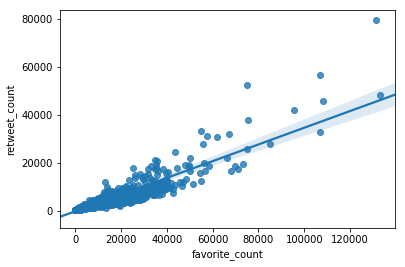

In [60]:
# Relationship between favorite count and retweet count
sns.regplot(x=master['favorite_count'], y=master['retweet_count'])

In [61]:
master.dog_stage.value_counts().head(1)


pupper    138
Name: dog_stage, dtype: int64

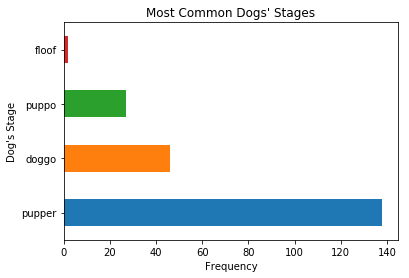

In [62]:
# rank the names frequency in a descending order
master.dog_stage.value_counts().sort_values(ascending =False)[:10].plot(kind = 'barh')
plt.title("Most Common Dogs' Stages")
plt.xlabel('Frequency')
plt.ylabel("Dog's Stage");

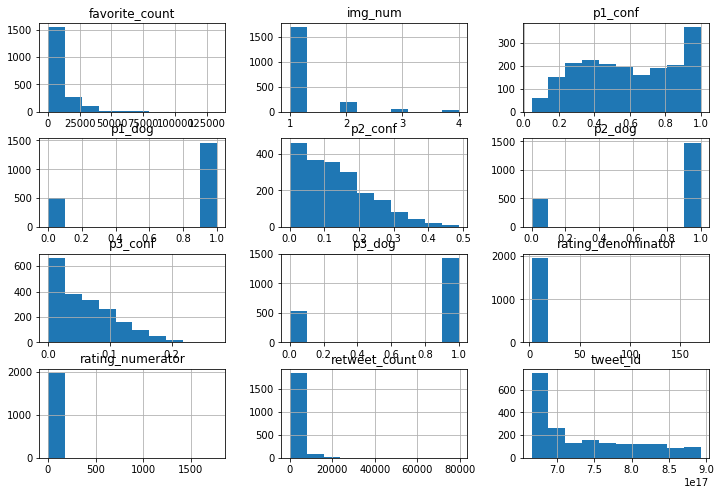

In [63]:
# General variables bar charts
master.hist(figsize=(12,8));

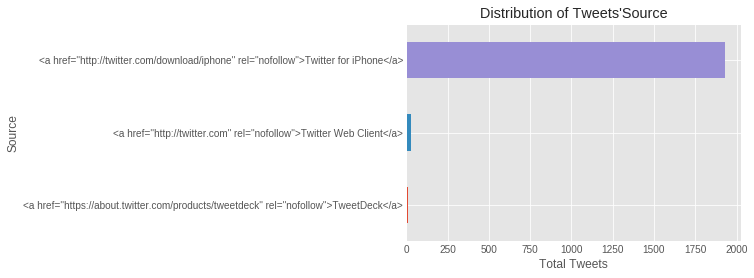

In [69]:
# Distribution of Tweets'Source
plt.title("Distribution of Tweets'Source")
master.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('Source');

### Insights:
1. There is seems to be a strong positive correlation between retweet_count and favorite_count.  Both variables move in the same direction , that means the change in one variable will affect the change in the other.
2. The Dog stage with the highest frequency is the Pupper stage.
3. The numerical variables are right-skewed distribution, and that means there is a positive relationship that is, the mean is greater than the median. The others are left-skewed distribution, and that means there is a negative relationship, that is, the median is greater than the mean.
4. The most common name is a bit inaccurate because most of it were none occurring about 524 and that is a lot. The next was the letter a as the second most common name, it was probably mistaken as the dog’s name instead of an article.
5. The most commonly used tweets’ source from the total tweets is Twitter for iPhone, making it look like the other sources (Twitter web client and TweetDeck) are non-existent because of the amount of tweeters use that Twitter for iPhone.
